# Unsupervised Machine Learning Challenge

In [1]:
#Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
#Data Import and Preparation
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#Remove the "MYOPIC" column
df_myopia = df_myopia.drop(columns=["MYOPIC"])
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
#Scaling Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_myopia[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR']])
data_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
        -6.72995906e-01,  1.84058063e-01,  4.98303926e-01],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -2.21409077e-01, -3.40932166e-01, -8.75087555e-01],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -6.72995906e-01,  1.84058063e-01, -7.50233784e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -6.72995906e-01, -8.65922394e-01, -1.37450264e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -6.72995906e-01,  1.05904178e+00, -1.88391815e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -6.72995906e-01,  1.84058063e-01, -7.50233784e-01]])

In [10]:
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [11]:
# Create new DataFrame with transformed data
df_myopia_2 = pd.DataFrame(data_scaled, columns=df_myopia.columns[2:])
df_myopia_2['MOMMY'] = df_myopia['MOMMY']
df_myopia_2['DADMY'] = df_myopia['DADMY']
df_myopia_2.head()


,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,1,0


In [12]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.90)
myopia_pca = pca.fit_transform(df_myopia_2)

In [13]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca
)
df_myopia_pca.head()

,0,1,2,3,4,5,6,7
0,0.050572,1.391703,-3.864601,-0.535778,0.806557,-2.374810,0.001768,-1.310681
1,-0.084798,-1.241298,0.733968,0.010492,-0.837928,-0.555873,0.191524,-0.416150
2,0.457177,-0.998887,-0.029936,0.692302,0.695279,0.201556,-0.292616,-0.204301
3,0.350187,1.116432,-1.944157,-0.990461,-0.638681,-1.274511,1.681204,0.728519
4,-0.905675,-2.290877,-0.996045,0.121801,0.420812,0.244048,0.092861,0.296519


In [14]:
# Reducing the dataset dimensions with t-SNE and visualizing results
tsne = TSNE(learning_rate=150)
tsne_features = tsne.fit_transform(df_myopia_pca)
tsne_features.shape

/Users/carlossoda/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

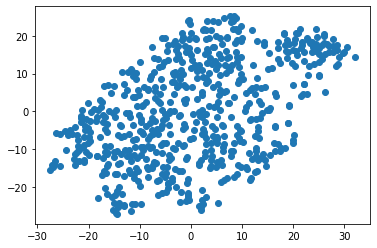

In [15]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

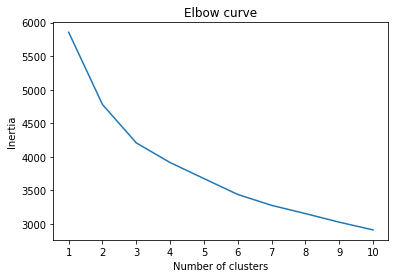

In [16]:
# Create an elbow plot (K-means)
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.title('Elbow curve')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Recommendations

Based on the tsne plot, which shows two separate clusters, and from the analysis previously made, is possible to conclude that we can cluster the data into two groups.